In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/firmai/random-assets-two/master/ts/monthly-beer-australia.csv")
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Megaliters
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [3]:
!pip install holidays==0.9.12

     |████████████████████████████████| 92kB 8.7MB/s 
  Created wheel for holidays: filename=holidays-0.9.12-cp37-none-any.whl size=47610 sha256=dfd2b865b60e1613018b0da52fdfe20ed5bef8726fd002dfae16957af7412b44
  Stored in directory: /root/.cache/pip/wheels/1f/fd/3a/f29866dc23dada18f25e9837477c82bbd7952aeef86fa46f11
Successfully built holidays
  Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [4]:
from atspy import AutomatedModel

INFO:root:Using GPU


In [5]:
model_list=["ARIMA","Gluonts","Prophet","NBEATS", "TATS", "TBATS1", "TBATP1", "TBATS2"]

In [ ]:
am = AutomatedModel(df = df , model_list=model_list, season="infer_from_data",forecast_len=60 )
forecast_in, performance = am.forecast_insample()
forecast_out = am.forecast_outsample()
all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
357
An insample split of training size 357 and testing size 119 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:root:Start model training


Model Gluonts is being trained for in sample prediction


INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:11<00:00,  4.44it/s, avg_epoch_loss=4.82]
INFO:root:Epoch[0] Elapsed time 11.265 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.816367
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:09<00:00,  5.12it/s, avg_epoch_loss=3.79]
INFO:root:Epoch[1] Elapsed time 9.779 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=3.790496
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:10<00:00,  4.95it/s, avg_epoch_loss=3.58]
INFO:root:Epoch[2] Elapsed time 10.108 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=3.583661
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:09<00:00,  5.04it/s, avg_epoch_loss=3.47]
INFO:root:Epoch[3] Elapsed time 9.916 seconds
INFO:root:Epoch[3] Evaluation metric 'ep

Model Prophet is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=119, forecast_length=119, share_thetas=False) at @139970808074064
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=119, forecast_length=119, share_thetas=False) at @139970807692432
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=119, forecast_length=119, share_thetas=False) at @139970808286352
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=119, forecast_length=119, share_thetas=False) at @139970807773264
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=119, forecast_length=119, share_thetas=False) at @139970807773520
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=119, forecast_length=119, share_thetas=False) at @139

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for out of sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 23324
100%|██████████| 50/50 [00:05<00:00,  8.79it/s, avg_epoch_loss=5.16]
INFO:root:Epoch[0] Elapsed time 5.691 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=5.161517
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.28it/s, avg_epoch_loss=3.97]
INFO:root:Epoch[1] Elapsed time 5.391 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=3.965395
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.26it/s, avg_epoch_loss=3.77]
INFO:root:Epoch[2] Elapsed time 5.405 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=3.771550
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.66it/s, avg_epoch_loss=3.72]
INFO:root:Epoch[3] Elapsed time 5.180 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=3.716913
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  9.38it/s, avg_epoch_loss=3.7]
INFO:

Model Prophet is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=60, forecast_length=60, share_thetas=False) at @139970891875792
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=60, forecast_length=60, share_thetas=False) at @139970836646928
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=60, forecast_length=60, share_thetas=False) at @139970836644176
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=60, forecast_length=60, share_thetas=False) at @139970891248272
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=60, forecast_length=60, share_thetas=False) at @139970891700560
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=60, forecast_length=60, share_thetas=False) at @1399708

In [ ]:
forecast_in.tail(n=5)

,Target,ARIMA,Gluonts,Prophet,NBEATS,TATS,TBATS1,TBATP1,TBATS2
Date,,,,,,,,,
1995-04-01,127.0,134.583193,157.936569,130.292142,140.641937,144.443071,144.443071,144.443071,150.911862
1995-05-01,151.0,132.588084,143.798889,127.550446,133.665329,139.038936,139.038936,139.038936,134.376430
1995-06-01,130.0,120.010451,137.513458,121.548336,125.070427,123.987403,123.987403,123.987403,125.768866
1995-07-01,119.0,128.425909,127.635979,117.271310,151.106445,133.429503,133.429503,133.429503,132.734944
1995-08-01,153.0,138.464141,135.842453,132.551147,150.446915,142.896517,142.896517,142.896517,142.777309


In [ ]:
forecast_out.head()

,ARIMA,Gluonts,Prophet,NBEATS,TATS,TBATS1,TBATP1,TBATS2
Date,,,,,,,,
1995-09-01,131.212115,132.394989,137.994560,149.681885,139.564198,139.564198,139.564198,140.757928
1995-10-01,162.521890,153.348969,170.817968,186.305923,161.480924,161.480924,161.480924,156.767413
1995-11-01,184.214121,170.674057,172.912507,190.414474,171.056798,171.056798,171.056798,178.197184
1995-12-01,180.196305,163.607529,183.248530,178.920197,185.186010,185.186010,185.186010,177.288838
1996-01-01,149.062585,164.297485,148.942213,175.811569,152.667538,152.667538,152.667538,155.881212


In [ ]:
performance

,Target,ARIMA,Gluonts,Prophet,NBEATS,TATS,TBATS1,TBATP1,TBATS2
rmse,0.000000,13.098059,20.486012,14.581954,19.346444,12.478766,12.478766,12.478766,13.296183
mse,0.000000,171.559145,419.676685,212.633388,374.284910,155.719600,155.719600,155.719600,176.788476
mean,155.293277,148.256628,149.159637,147.467412,150.212372,153.335240,153.335240,153.335240,153.139068


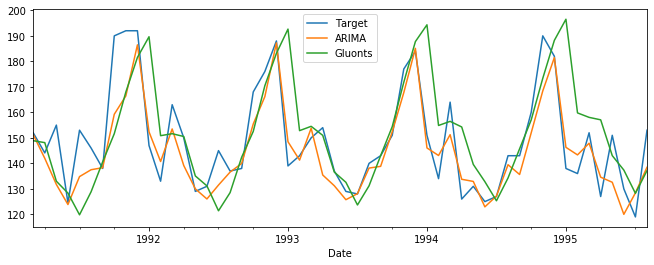

In [ ]:
all_ensemble_in[["Target","ARIMA","Gluonts"]].plot()
# ,"Prophet","NBEATS","TATS","TBATS1","TBATP1","TBATS2"

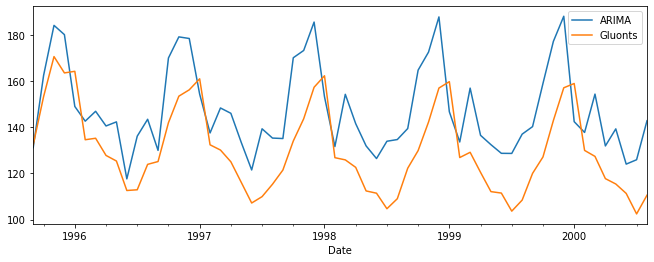

In [ ]:
all_ensemble_out[["ARIMA","Gluonts"]].plot()

In [ ]:
am.models_dict_in

{'ARIMA': ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 3), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(1, 0, 1, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True),
 'Gluonts': <gluonts.model.predictor.RepresentableBlockPredictor at 0x7f9c19e3e390>,
 'NBEATS': {'constant': 217.8, 'model': NBeatsNet(
    (parameters): ParameterList(
        (0): Parameter containing: [torch.cuda.FloatTensor of size 128x119 (GPU 0)]
        (1): Parameter containing: [torch.cuda.FloatTensor of size 128 (GPU 0)]
        (2): Parameter containing: [torch.cuda.FloatTensor of size 128x128 (GPU 0)]
        (3): Parameter containing: [torch.cuda.FloatTensor of size 128 (GPU 0)]
        (4): Parameter containing: [torch.cuda.FloatTensor of size 128x128 (GPU 0)]
        (5): Parameter containing: [torch.cuda.FloatTensor of size 128 (GPU 0)]
        (6): Parameter containing: [torch.cuda.FloatTensor of size 128x128 (GPU 0)]
        (

In [ ]:
am.models_dict_out

{'ARIMA': ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 4), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(2, 0, 2, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True),
 'Gluonts': <gluonts.model.predictor.RepresentableBlockPredictor at 0x7f9c1403e400>,
 'NBEATS': {'model': NBeatsNet(
    (parameters): ParameterList(
        (0): Parameter containing: [torch.cuda.FloatTensor of size 128x60 (GPU 0)]
        (1): Parameter containing: [torch.cuda.FloatTensor of size 128 (GPU 0)]
        (2): Parameter containing: [torch.cuda.FloatTensor of size 128x128 (GPU 0)]
        (3): Parameter containing: [torch.cuda.FloatTensor of size 128 (GPU 0)]
        (4): Parameter containing: [torch.cuda.FloatTensor of size 128x128 (GPU 0)]
        (5): Parameter containing: [torch.cuda.FloatTensor of size 128 (GPU 0)]
        (6): Parameter containing: [torch.cuda.FloatTensor of size 128x128 (GPU 0)]
        (7): Parameter contai